In [3]:
import sys 
import os

In [4]:
src_path = os.path.abspath("../")
if src_path not in sys.path:
    sys.path.append(src_path)

In [5]:
from src.tools.md_class_functions import *
from src.tools.md_class_utility import*
from src.tools.md_class_graphs import *
from src.water_md_class import *

### Set path to your lammps file and initialise trajectory object

In [6]:
# path towards an ion trajectory with recombination happening
water_path = "../testing/recombination_tester.lammpstrj"

In [7]:
 #initialise trajectory object by passing path, format and scaling = 0 means not scaled -> will be scaled in __init__
trj = Trajectory(water_path, format="lammpstrj", scaled=0, verbosity="silent")

### Access class atributes of the Trajectory object 

In [6]:
    # access class atributes which are calculated on initialisation, basic information about the trajectory 
    print("Trajectory first 3 rows")
    print(trj.trajectory[0, :3, :])
    print("box dimensions")
    print(trj.box_dim[0])
    print("box size")
    print(trj.box_size[0])
    print("number of atoms")
    print(trj.n_atoms)
    print("number of timesteps")
    print(trj.n_snapshots)
    print("species split")
    print("s1 = Hydrogen")
    print(trj.s1[0][:3, :])
    print("s2 = Oxygen")
    print(trj.s2[0][:3, :])
    print("did recombine?")
    print(trj.did_recombine)
    print("Recombination Time")
    print(trj.recombination_time)

Trajectory first 3 rows
[[1.43000000e+02 1.00000000e+00 8.03905819e-01 4.65804192e-02
  2.01737819e-01]
 [1.37000000e+02 1.00000000e+00 8.21091819e-01 1.29108819e-01
  1.63652819e-01]
 [6.20000000e+01 1.00000000e+00 8.71580819e-01 2.45479819e-01
  2.67572819e-01]]
box dimensions
[[-0.04968662 16.25073041]
 [-0.04968662 16.25073041]
 [-0.04968662 16.25073041]]
box size
[16.30041703 16.30041703 16.30041703]
number of atoms
384
number of timesteps
1501
species split
s1 = Hydrogen
[[1.43000000e+02 1.00000000e+00 8.03905819e-01 4.65804192e-02
  2.01737819e-01]
 [1.37000000e+02 1.00000000e+00 8.21091819e-01 1.29108819e-01
  1.63652819e-01]
 [6.20000000e+01 1.00000000e+00 8.71580819e-01 2.45479819e-01
  2.67572819e-01]]
s2 = Oxygen
[[3.59000000e+02 2.00000000e+00 2.29213819e-01 4.36805819e-01
  8.62509192e-02]
 [3.22000000e+02 2.00000000e+00 6.47391819e-01 2.38568819e-01
  2.68210192e-02]
 [3.05000000e+02 2.00000000e+00 4.56863819e-01 1.21592819e-01
  4.57607819e-01]]
did recombine?
True
Reco

### Class Methods


In [7]:
#sets the self.distance attribute
trj.get_ion_distance()

array([[0.00000000e+00, 4.15562819e-01, 2.14361819e-01, ...,
        2.81206819e-01, 5.12356819e-01, 3.84737031e-01],
       [1.00000000e+00, 4.18365674e-01, 2.15973674e-01, ...,
        2.78163674e-01, 5.11357674e-01, 3.87250464e-01],
       [2.00000000e+00, 4.23268966e-01, 2.22704966e-01, ...,
        4.67599966e-01, 8.98261966e-01, 5.86682386e-01],
       ...,
       [1.49800000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.49900000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.50000000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

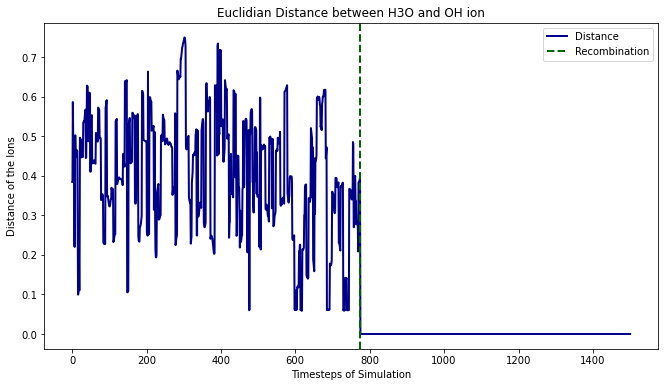

In [8]:
plot_ion_distance_euc(trj, (11, 6))

In [9]:
#for further evaluations i just pick one timestep < recombination_time
time_step = 773

In [10]:
bonding_list, unique_oxygens, ions = trj.get_hydrogen_bonds(timestep=time_step, cutoff=2.9, starting_oh=True)

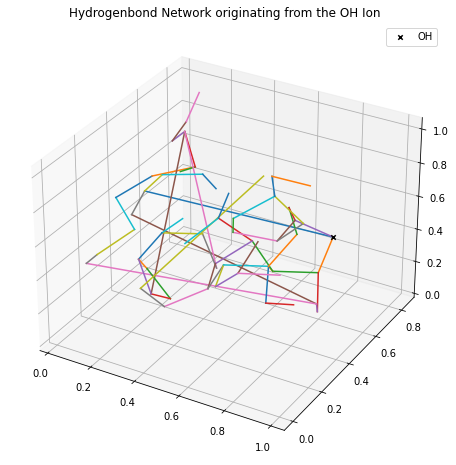

In [11]:
plot_hbonds_single(bonding_list, trj.s2[time_step], start="OH", fig_size=(10, 8))

In [12]:
bonds_H3O, oxygens_H3O, ions =  trj.get_hydrogen_bonds(timestep=time_step, cutoff=2.9, starting_oh=False)
bonds_OH, oxygens_OH, _ =  trj.get_hydrogen_bonds(timestep=time_step, cutoff=2.9, starting_oh=True)

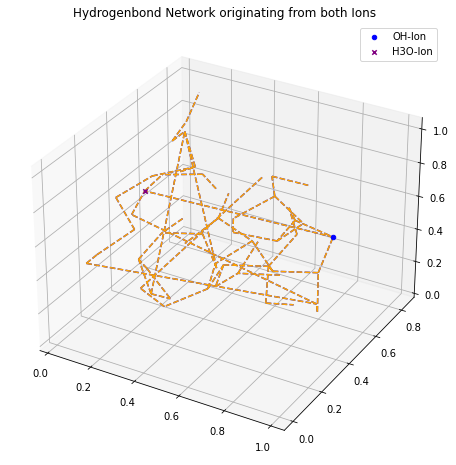

In [13]:
plot_hbond_network(bonds_OH, bonds_H3O, trj.s2[time_step], ions, fig_size=(10, 8))

In [14]:
# HB bonds for the entire trajectory
hb_timeseries = get_HB_timeseries(trj)

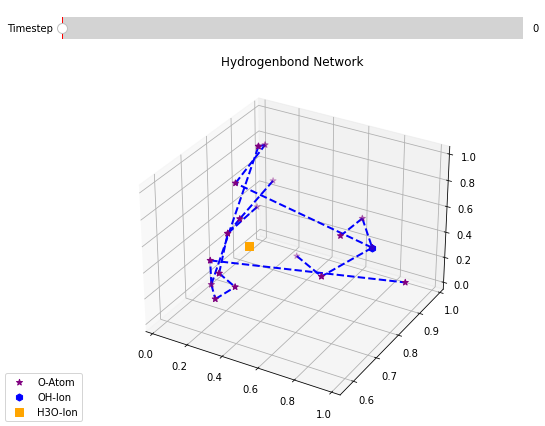

In [15]:
# use %matplotlib widget or similar to make interactive
plot_HB_network(hb_timeseries, trj.s2, plot_oxygen=True)

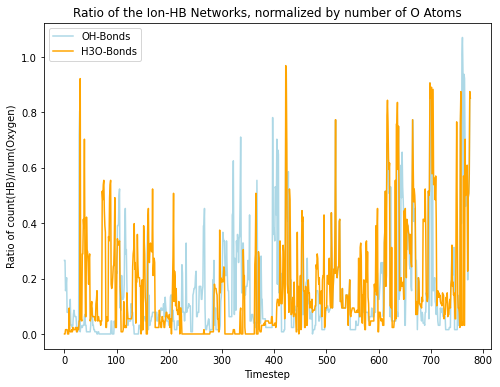

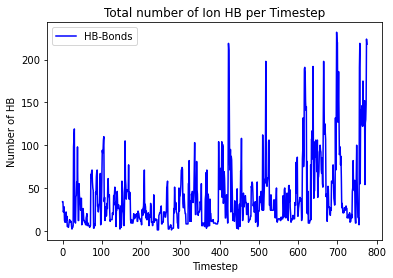

In [16]:
plot_HB_ratio(hb_timeseries, n_atoms=trj.n_atoms)

In [17]:
wire_lengths, h_bonds = get_all_wires(trj)

In [18]:
%matplotlib widget

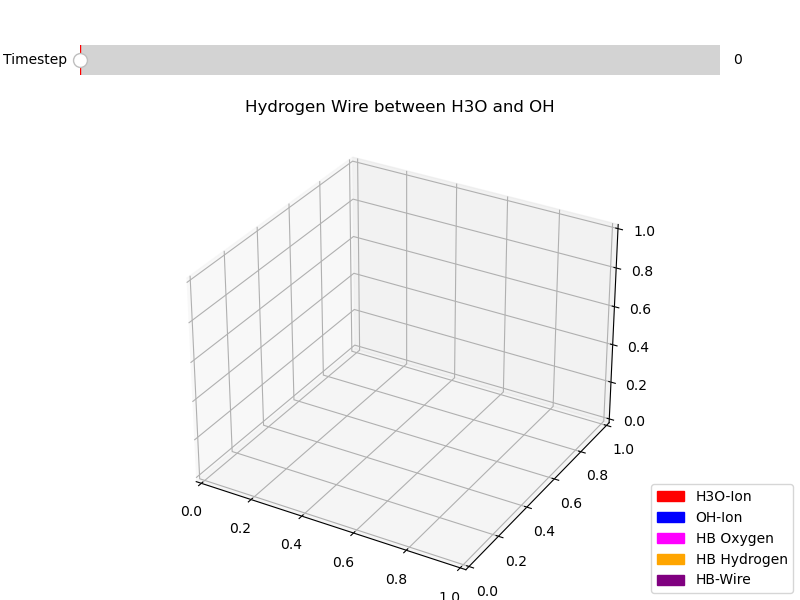

In [35]:
plot_HB_wire(h_bonds, trj, plot_hydrogens=True)

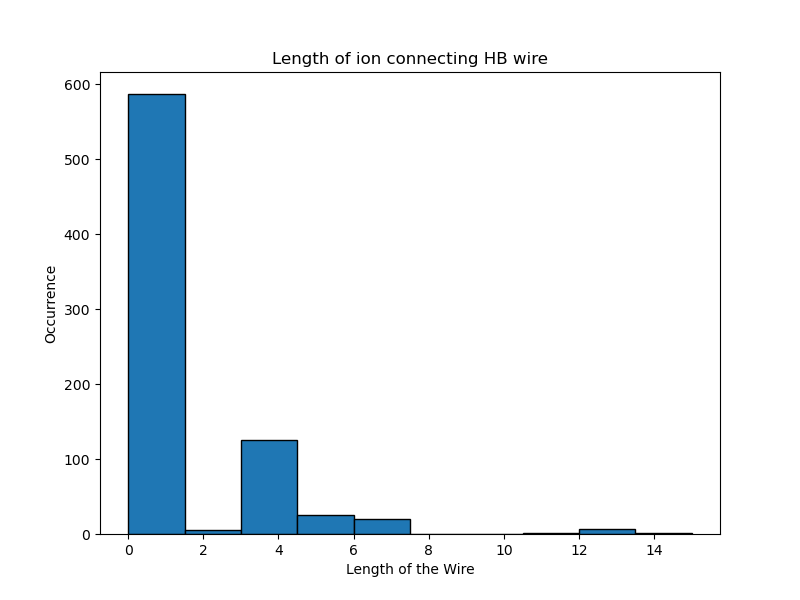

In [20]:
plot_wire_length(wire_lengths)

In [8]:
OO_rdf = trj.get_rdf_rdist(stop=8.0)

In [10]:
OO_rdf

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.45987892e-05, 1.35917809e-02, 2.58506651e-01,
        1.65708041e+00, 2.47584386e+00, 1.78939042e+00, 1.07763648e+00,
        7.94413519e-01, 7.33384368e-01, 7.93545456e-01, 8.70947902e-01,
        9.58686279e-01, 1.05407100e+00, 1.13326348e+00, 1.16135946e+00,
        1.17740146e+00, 1.14043066e+00, 1.09036798e+00, 1.03572296e+00,
        9.61950002e-01, 9.03879480e-01, 8.76933061e-01, 8.80900487e-01,
        8.95975441e-01, 9.17902965e-01, 9.58010962e-01, 9.93308472e-01,
        1.03156029e+00, 1.05038260e+00, 1.06029490e+00, 1.05466575e+00,
        1.04648537e+00, 1.02492175e+00, 1.00432788e+00, 9.92589123e-01,
        9.79866862e-01]),
 array([0.17306122, 0.33612245, 0.49918367, 0.6622449 , 0.82530612,
        0.98836735, 1.15142857, 1.3144898 

In [22]:
HH_rdf = trj.get_rdf_rdist(gr_type="HH")

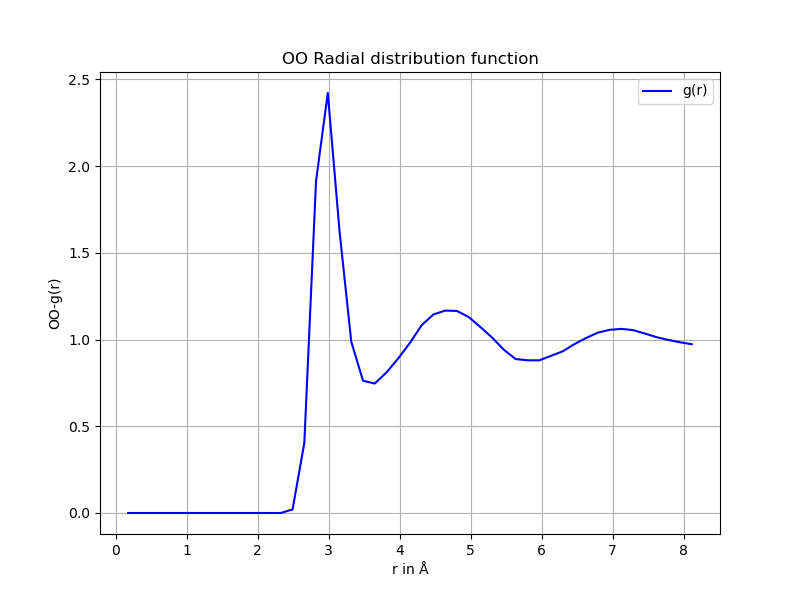

In [23]:
plot_rdf(OO_rdf[0], OO_rdf[1])

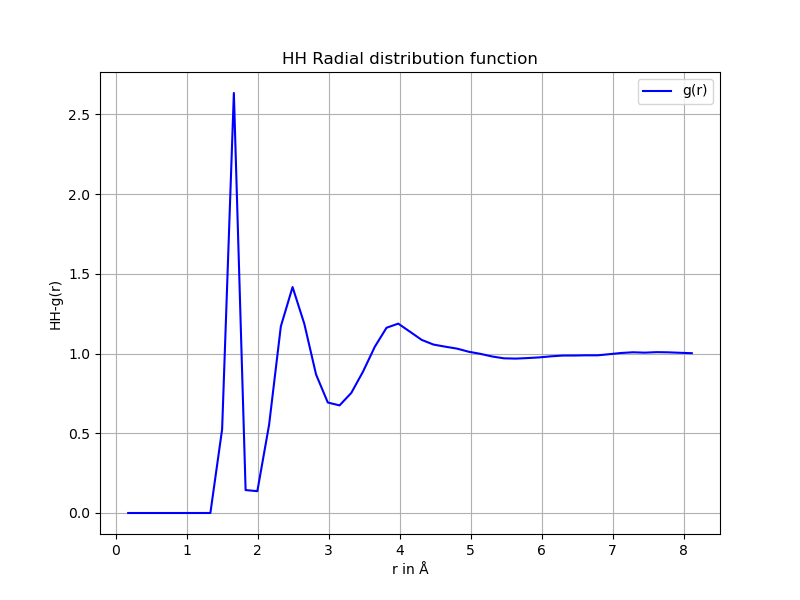

In [24]:
plot_rdf(HH_rdf[0], HH_rdf[1], type="HH")

In [6]:
MSD = trj.get_MSD()

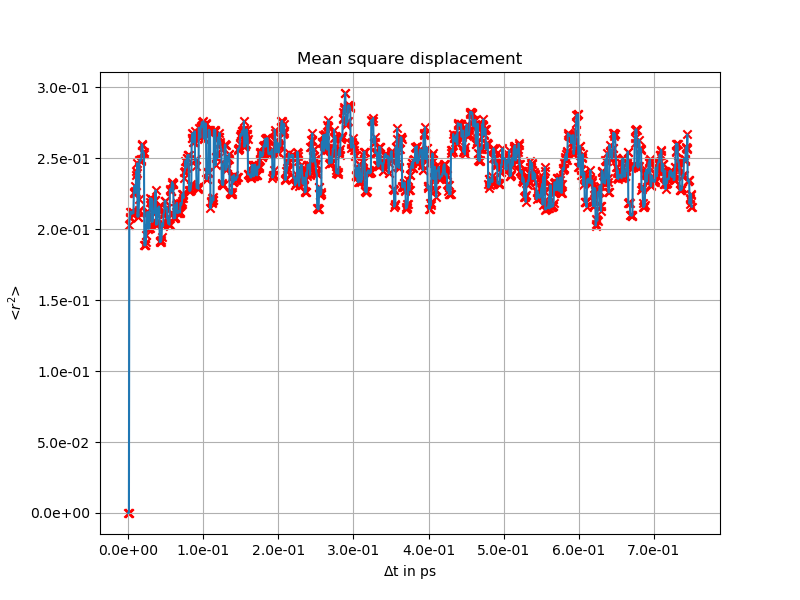

In [26]:
plot_MSD(MSD)

In [7]:
diff = trj.get_translational_diffusion(MSD)
diff

IndexError: invalid index to scalar variable.

### Trajectory Manipulation




In [28]:
#trjwater.lammpstrj is just a water sim trajectory without ions 
#note: (actually already has ions in it but they dont recombine still same concept)
path_water = "../testing/trjwater.lammpstrj"

In [29]:
traj_2 = Trajectory(file=path_water, format="lammpstrj", scaled=1, verbosity="loud")

Processing Snapshot:1
Processing Snapshot:2
Processing Snapshot:3
Processing Snapshot:4
Processing Snapshot:5
Processing Snapshot:6
Processing Snapshot:7
Processing Snapshot:8
Processing Snapshot:9
Processing Snapshot:10
Processing Snapshot:11
Processing Snapshot:12
Processing Snapshot:13
Processing Snapshot:14
Processing Snapshot:15
Processing Snapshot:16
Processing Snapshot:17
Processing Snapshot:18
Processing Snapshot:19
Processing Snapshot:20
Processing Snapshot:21
Processing Snapshot:22
Processing Snapshot:23
Processing Snapshot:24
Processing Snapshot:25
Processing Snapshot:26
Processing Snapshot:27
Processing Snapshot:28
Processing Snapshot:29
Processing Snapshot:30
Processing Snapshot:31
Processing Snapshot:32
Processing Snapshot:33
Processing Snapshot:34
Processing Snapshot:35
Processing Snapshot:36
Processing Snapshot:37
Processing Snapshot:38
Processing Snapshot:39
Processing Snapshot:40
Processing Snapshot:41
Processing Snapshot:42
Processing Snapshot:43
Processing Snapshot:

Attribute Error occurred(received list instead of numpy array) using 75 element of the list
Attribute Error occurred(received list instead of numpy array) using 76 element of the list
Attribute Error occurred(received list instead of numpy array) using 77 element of the list
Attribute Error occurred(received list instead of numpy array) using 78 element of the list
Attribute Error occurred(received list instead of numpy array) using 79 element of the list
Attribute Error occurred(received list instead of numpy array) using 80 element of the list
Attribute Error occurred(received list instead of numpy array) using 81 element of the list
Attribute Error occurred(received list instead of numpy array) using 82 element of the list
Attribute Error occurred(received list instead of numpy array) using 83 element of the list
Attribute Error occurred(received list instead of numpy array) using 84 element of the list
Attribute Error occurred(received list instead of numpy array) using 85 element 

In [30]:
# generate ion trajectories for ion MD runs
traj_2.get_displace(snapshot=50, distance=0.4, eps=0.05, path="../tutorial_notebook/", num_traj=2)

0
distance too far, trying next O
distance too far, trying next O
distance too far, trying next O
displace
trajectory saved as water_0.data
1
distance too far, trying next O
distance too far, trying next O
distance too far, trying next O
displace
trajectory saved as water_1.data


In [31]:
#cut out trajectory at timestamp 50
traj_2.cut_snapshot(snapshot=50, path="../tutorial_notebook/")

In [32]:
# remove 20 atoms from timestap 50
traj_2.remove_atoms(N=20, snap=50, format_out="lammps")

(128, 5) (256, 5)
Attribute Error occurred(received list instead of numpy array) using 50 element of the list
(109, 5) (218, 5)


In [33]:
# group together the molecules and writes it into a ovito readable lammpstrj file
traj_2.group_molecules(path="../tutorial_notebook/")

Attribute Error occurred(received list instead of numpy array) using 0 element of the list
Attribute Error occurred(received list instead of numpy array) using 1 element of the list
Attribute Error occurred(received list instead of numpy array) using 2 element of the list
Attribute Error occurred(received list instead of numpy array) using 3 element of the list
Attribute Error occurred(received list instead of numpy array) using 4 element of the list
Attribute Error occurred(received list instead of numpy array) using 5 element of the list
Attribute Error occurred(received list instead of numpy array) using 6 element of the list
Attribute Error occurred(received list instead of numpy array) using 7 element of the list
Attribute Error occurred(received list instead of numpy array) using 8 element of the list
Attribute Error occurred(received list instead of numpy array) using 9 element of the list
Attribute Error occurred(received list instead of numpy array) using 10 element of the lis

Attribute Error occurred(received list instead of numpy array) using 91 element of the list
Attribute Error occurred(received list instead of numpy array) using 92 element of the list
Attribute Error occurred(received list instead of numpy array) using 93 element of the list
Attribute Error occurred(received list instead of numpy array) using 94 element of the list
Attribute Error occurred(received list instead of numpy array) using 95 element of the list
Attribute Error occurred(received list instead of numpy array) using 96 element of the list
Attribute Error occurred(received list instead of numpy array) using 97 element of the list
Attribute Error occurred(received list instead of numpy array) using 98 element of the list
Attribute Error occurred(received list instead of numpy array) using 99 element of the list


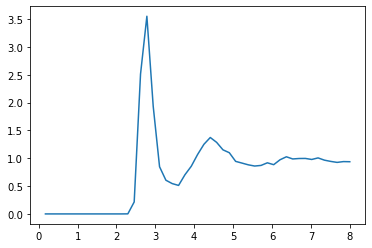

In [6]:
data = np.loadtxt("C:\\Users\\Nutzer\\Documents\\GitHub\\MD_Lammps_analysis_class\\tutorial_notebook\\OH_ion_RDF_averaged.csv", delimiter=",")
plt.plot(data[1], data[0])

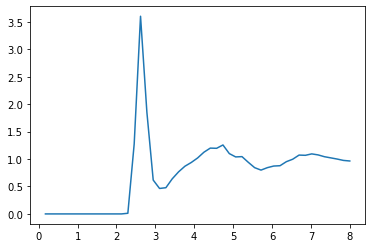

In [7]:
data = np.loadtxt("C:\\Users\\Nutzer\\Documents\\GitHub\\MD_Lammps_analysis_class\\tutorial_notebook\\H3O_ion_RDF_averaged.csv", delimiter=",")
plt.plot(data[1], data[0])

In [8]:
h3o_ids_ts = np.empty((trj.recombination_time, ), dtype=int)
oh_ids_ts = np.empty((trj.recombination_time, ), dtype=int)
for ts in range(trj.recombination_time):
    
    OH_id = None
    H3O_id = None

    # note: find nearest O atom for each H atom
    indexlist_group, _ = trj.get_neighbour_KDT(species_1=trj.s1[ts],
                                                species_2=trj.s2[ts], mode="pbc", snapshot=ts)

    # note: find he  number of  occourence of O atoms for which it is the nearest to an H atom.
    # -> for H2O each O atom will count twice, for each H3O+ each O atom will count 3 times and so on.
    temp = [None] * trj.s2[ts].shape[0]
    for O_atom in range(trj.s2[ts].shape[0]):
        temp[O_atom] = np.append(np.argwhere(indexlist_group == O_atom), O_atom)

    # check how often each O atom counted -> molecules formation  OH- = 1 time H3O+  3 Times  H2O 2 times.
    for ind, _list in enumerate(temp):
        if len(_list) == 2:
            OH_id = _list[-1]
        if len(_list) == 4:
            H3O_id = _list[-1]
            
    h3o_ids_ts[ts] = trj.s2[ts][H3O_id, 0]
    oh_ids_ts[ts] = trj.s2[ts][OH_id, 0]


jumps = []
diffusion = []
for position_id in range(1, trj.recombination_time):
    if h3o_ids_ts[position_id-1] != h3o_ids_ts[position_id]:
        jumps.append(position_id-1)
    else:
        diffusion.append(position_id-1)
        
        

    


In [9]:
h3o_ids_ts

array([290, 290, 370, 370, 370, 370, 290, 290, 370, 370, 370, 290, 290,
       290, 290, 290, 370, 370, 290, 370, 370, 370, 370, 370, 370, 370,
       370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 325, 325,
       325, 370, 370, 370, 325, 325, 325, 370, 370, 370, 325, 325, 370,
       370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370,
       370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370,
       370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370,
       370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370,
       370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370,
       370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370,
       370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370,
       370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370,
       370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370,
       370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370, 37

In [114]:
jumps

[1,
 5,
 7,
 10,
 15,
 17,
 18,
 36,
 39,
 42,
 45,
 48,
 50,
 203,
 204,
 219,
 220,
 222,
 277,
 305,
 321,
 324,
 334,
 336,
 362,
 365,
 390,
 392,
 394,
 396,
 421,
 424,
 428,
 431,
 436,
 438,
 441,
 444,
 447,
 450,
 451,
 459,
 460,
 463,
 470,
 472,
 475,
 477,
 486,
 488,
 496,
 497,
 504,
 506,
 529,
 533,
 536,
 538,
 541,
 544,
 547,
 558,
 559,
 599,
 602,
 609,
 611,
 623,
 625,
 641,
 645,
 647,
 651,
 653,
 684,
 754,
 756,
 759,
 761,
 763,
 769]

In [11]:
diffusion

[0,
 2,
 3,
 4,
 6,
 8,
 9,
 11,
 12,
 13,
 14,
 16,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 38,
 40,
 41,
 43,
 44,
 46,
 47,
 49,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 1

In [115]:
def get_diffusion_distance(jumps: [int], diffusion: [int], ion_ids: [int], trj: Trajectory):
    
    coordinates = trj.s2
    temp = []
    diffusion_distances = []

    previous = diffusion[0]
    intervalls = []
    _temp = []


    for diff_ts in range(1, len(diffusion)):
        #print(previous)
        if (diffusion[diff_ts] - 1 == previous): 
            _temp.append(previous)
            previous = diffusion[diff_ts]
        else:
            _temp.append(previous)
            if len(_temp) > 1:
                intervalls.append(_temp)
            _temp = []
            previous = diffusion[diff_ts]
    print(intervalls)
    for diffusion_int in intervalls:
        for diff in range(len(diffusion_int) -1):
            temp.append(get_distance(coordinates[diffusion_int[diff]][coordinates[diffusion_int[diff]][:, 0]==ion_ids[diffusion_int[diff]], 2:][0],
                                    coordinates[diffusion_int[diff+1]][coordinates[diffusion_int[diff+1]][:, 0]==ion_ids[diffusion_int[diff+1]], 2:][0],
                                    mode="pbc"))
        diffusion_distances.append(sum(temp))
        temp = []
    return diffusion_distances
        

In [107]:
def get_jump_distances(jumps: [int], ion_ids: [int], trj: Trajectory):
    
    coordinates = trj.s2
    jump_distances = []
    
    for jump_ts in range(len(jumps)):
        jump_distances.append(get_distance(coordinates[jumps[jump_ts]][coordinates[jumps[jump_ts]][:, 0] == ion_ids[jumps[jump_ts]], 2:][0],
                                          coordinates[jumps[jump_ts]-1][coordinates[jumps[jump_ts]-1][:, 0] == ion_ids[jumps[jump_ts]-1], 2:][0],
                                          mode="pbc"))
        
    return jump_distances

In [116]:
diff_dist = get_diffusion_distance(jumps, diffusion, h3o_ids_ts, trj)
jump_dist = get_jump_distances(jumps, h3o_ids_ts, trj)

[[2, 3, 4], [8, 9], [11, 12, 13, 14], [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], [37, 38], [40, 41], [43, 44], [46, 47], [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202], [205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218], [223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 2

In [112]:
jump_dist

[0.0007742769588260216,
 0.002259876173787383,
 0.0006822598058495964,
 0.0031939326643895564,
 0.0018502112105853034,
 0.0023126949944523873,
 0.14742478259262357,
 0.002912423512645747,
 0.0025737455156387393,
 0.0005397894779954964,
 0.0026570119035897594,
 0.002735269567085216,
 0.0025673901412833623,
 0.0023144019512214044,
 0.14933358039354447,
 0.0015804199465189817,
 0.14554207821140103,
 0.0006145313044142664,
 0.0030321424956804284,
 0.0018035790339458238,
 0.0033204942224332374,
 0.004695515038335101,
 0.0020223927292858214,
 0.0015154247237462778,
 0.001966937713760942,
 0.0019342563490334546,
 0.002106799335122431,
 0.0005358216579507676,
 0.0015637256532667681,
 0.0011261320009202196,
 0.00181200424405091,
 0.0003231455615377398,
 0.0008966104206854457,
 0.004226746633095234,
 0.0032528760073978714,
 0.0024733609253425786,
 0.0031392924281683854,
 0.001839794933360414,
 0.00332225291984057,
 0.0044288423194885265,
 0.15533570869490337,
 0.003570255166265794,
 0.1522695765

In [109]:
diff_dist

[0.004109157958318963,
 0.003638098131520049,
 0.006102070004319157,
 0.04331680012182845,
 0.0023558825962602553,
 0.0005325647527188279,
 0.0024288657676718455,
 0.0023335344549544126,
 0.36181297295243575,
 0.022191034217039204,
 0.1125059768743336,
 0.042819932262918886,
 0.02353523791552152,
 0.005198443811164451,
 0.0150390762608224,
 0.05275380756843759,
 0.0018607756219963401,
 0.0449275567581701,
 0.0422855043363089,
 0.0013903297442035987,
 0.0012176349968108765,
 0.004130767157720267,
 0.011500060963200852,
 0.0026673787992105807,
 0.0023257621002992818,
 0.0037846657208570507,
 0.0025941107753330527,
 0.021932071319612313,
 0.0029465489967957,
 0.0152947861946695,
 0.0014902682246487556,
 0.015673203960879727,
 0.011416492635141997,
 0.008923087053902674,
 0.049630466381450106,
 0.002341219763047491,
 0.0013647884871909068,
 0.0016324514722793936,
 0.0009067195653229988,
 0.0015270945506525896,
 0.015414044745276318,
 0.0672238616599237,
 0.003181997747434673,
 0.0173194525

In [110]:
len(diff_dist)

52

In [84]:
for _ in range(5):
    print(_)

0
1
2
3
4


In [85]:
_

4